#### Importando Librerias

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.model_selection import GridSearchCV

#### Importando Datos 

In [54]:
df_train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')#1-1460
df_test= pd.read_csv('house-prices-advanced-regression-techniques/test.csv')#1460-2919
#importar los datos

In [55]:
all_data=pd.concat((df_train,df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'],axis=1,inplace=True)
all_data.head()
#Se unen los dos data frames para manipular los datos

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


### Descartando variables tras resultados de la matriz de correlacion

In [56]:
all_data = all_data.drop(columns=['GarageArea','1stFlrSF', 'GarageYrBlt'])
#Se eliminan variables que estan muy correlacionadas entre si.

## Datos Faltantes

Necesitamos saber si los datos faltantes tienen algun patron o si su ausencia es al azar. Tambien queremos saber con que frecuencia faltan datos y si es que es importante o no su ausencia.

In [57]:
#Se detecta que datos de la tabla de informacion son NA, se suman, y se ordenan de mayor a menor la cantidad
#de datos faltantes
total = all_data.isnull().sum().sort_values(ascending=False)
#Se calcula el porcentaje de datos faltantes, y se ordenan de mayor a menor la cantidad resultante.
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
#Se guarda la informacion en una tabla para visualizar los calculos
missing_data = pd.concat([total, percent], axis=1, keys=['Total de Datos Faltantes', 'Porcentaje'])
missing_data.head(32)
#Nos muestra una tabla ordenada de manera descendiente de los datos que faltan.

,Total de Datos Faltantes,Porcentaje
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageQual,159,0.054471
GarageCond,159,0.054471
GarageFinish,159,0.054471
GarageType,157,0.053786


Las variables<br><br>
'PoolQC' (calidad de la alberca)<br>
'MiscFeature' (Otras particularidades de la casa)<br>
'Alley' (Tipo de vía de acceso a la propiedad)<br>
'Fence' (calidad del cercado)<br>
'FireplaceQu' (calidad de la chimenea)<br>
'LotFrontage' (Pies de calle conectados a la propiedad)<br><br>
son caracteristicas que las casas pueden o no tener, es decir, que el dato sea NA, significa que la casa no cuenta con esa carcterística, no que no haya dato.

Las siguientes variables que tienen "datos faltantes" son <br><br>
'GarageCond' (Condicion del garaje)<br>
'GarageType' (En que parte de la casa se encuentra)<br>
'GarageFinish' (Acabado interior del garaje)<br>
'GarageQual' (Calidad del garaje)<br><br>
Podemos ver que todas las variables relacionadas con el garaje en la tabla anterior, tienen exactamente la misma cantidad de datos faltantes, esto podria ser debido a que todos esos datos fueron tomados en un mismo conjunto de de observaciones. En estas variables el NA no significa dato faltante, mas bien que no hay garaje.

Bajo la misma lógica, en las variables <br><br>
'BsmtExposure' (Se refiere a los muros a nivel del jardín o de la calle)<br>
'BsmtFinType2' (Calificación de la superficie del sótano)<br>
'BsmtFinType1' (Calificación de la superficie terminada del sótano)<br>
'BsmtCond' (Evalúa el estado general del sótano)<br>
'BsmtQual' (Evalúa la altura del sótano)BsmtExposure<br><br>
el NA no significa dato faltante, mas bien que no hay sotano.

Al observar la información de cada variable anterior en el archivo data_descrption, nos dimos cuenta que eliminar éstos significaría perder mucha información. Por ejemplo, para 'PoolQC' (calidad de la alberca) el no tener este dato significaba que la casa no tenía alberca, si quitaramos éste  perderíamos la condición de tener alberca o no en las casas. Dicho esto, cada variable aportaba información a nuestro modelo y para evitar problemas con los datos faltantes decidimos sustituir el NA por "None", para que la regresion no tenga problemas.

In [58]:
cols_w_na=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageCond','GarageFinish',
           'GarageQual','GarageType','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1']
for i in cols_w_na:
    all_data[i]=all_data[i].fillna('None')
#para las variables que se menciona, llena el dato que falta con "None"

Para las variables<br><br>
'Electrical' (Tipo de sistema electrico)<br>
'MSZoning' (Identifica la clasificación zonal general de la venta)<br> 
'BsmtFullBath' (Baños completos del sotano)<br>
'BsmtHalfBath' (Medios baños del sotano)<br>
'Functional' (Funcionalidad de la casa)<br>
'Utilities' (Tipo de servicios disponibles)<br> 
'GarageCars' (Tamaño del garaje en capacidad de coches)<br>
'Exterior1st' (Revestimiento exterior de la casa)<br>
'TotalBsmtSF' (Total de pies cuadrados de superficie de sótano)<br>
'KitchenQual' (calidad de la cocina)<br>
'Exterior2nd' (Revestimiento exterior de la casa)<br>
'SaleType' (tipo de venta)<br>
'BsmtUnfSF' (Pies cuadrados de superficie de sótano sin terminar)<br>
'BsmtFinSF2' (Pies cuadrados de superficie de sótano terminados tipo 2)<br>
'BsmtFinSF1' (Pies cuadrados de superficie de sótano terminados tipo 1)<br>
'MasVnrArea'(Área de revestimiento de mampostería en pies cuadrados)<br>
'MasVnrType' (Tipo de revestimiento de mampostería)<br><br>
 hacen falta pocos datos de cada una. 
Por lo que podemos sustituir los NA de esas observaciones con valores que indiquen la falta de datos en cada variable, para que asi nos pueda servir en el análisis.

In [59]:
all_data['Functional']=all_data['Functional'].fillna('Typ')
all_data['MSZoning']=all_data['MSZoning'].fillna('Other')
all_data['Utilities']=all_data['Utilities'].fillna('Other')
all_data['Electrical']=all_data['Electrical'].fillna('Other')
all_data['Exterior1st']=all_data['Exterior1st'].fillna('Other')
all_data['KitchenQual']=all_data['KitchenQual'].fillna('Other')
all_data['Exterior2nd']=all_data['Exterior2nd'].fillna('Other')
all_data['SaleType']=all_data['SaleType'].fillna('Oth')
all_data['BsmtUnfSF']=all_data['BsmtUnfSF'].fillna(0)
all_data['BsmtFinSF2']=all_data['BsmtFinSF2'].fillna(0)
all_data['BsmtFinSF1']=all_data['BsmtFinSF1'].fillna(0)
all_data['BsmtFullBath']=all_data['BsmtFullBath'].fillna(0)
all_data['GarageCars']=all_data['GarageCars'].fillna(0)
all_data['TotalBsmtSF']=all_data['TotalBsmtSF'].fillna(0)
all_data['BsmtHalfBath']=all_data['BsmtHalfBath'].fillna(0)
all_data['MasVnrArea']=all_data['MasVnrArea'].fillna(0)
all_data['MasVnrType']=all_data['MasVnrType'].fillna('None')
#rellenamos los datos faltantes de dichas variables por los que se mencionan

In [60]:
all_data.isnull().sum().max() #Se checa que ya no haya datos faltantes

0

## Normalidad

Un Distplot o gráfica de distribución, representa la variación en la distribución de los datos. El Distplot de Seaborn representa la distribución global de las variables de datos continuos. El Distplot representa los datos mediante un histograma y una línea en combinación con él.

La funcion scipy.stats.probplot genera una gráfica de probabilidad de los datos de la muestra contra los cuantiles de una distribución teórica especificada (la distribución normal por defecto). probplot calcula opcionalmente una línea de mejor ajuste para los datos y traza los resultados usando Matplotlib o una función de trazado dada.

#### Análisis 'SalePrice'

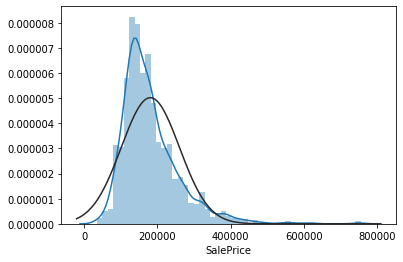

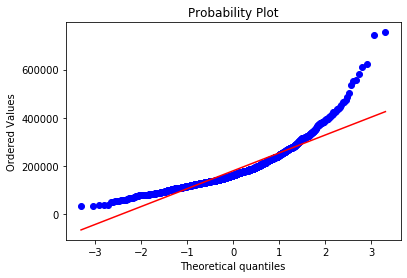

In [61]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
#Creamos un histograma y gráfico de probabilidad normal de SalePrice

'SalePrice' no es normal ya que muestra picos, asimetría positiva y no sigue la línea diagonal. En caso de asimetría positiva, las transformaciones logarítmicas suelen funcionar bien para normalizar los datos.

In [62]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])
#Normalizamos los datos usando transformacioness logaritmivas

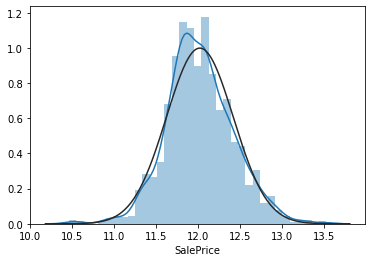

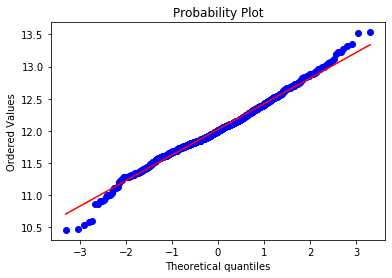

In [63]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
#Nuevamente, creamos el histograma y el grafico de probabilidad para observar si funciono la transformación

In [64]:
#Convirtiendo a tipo string las variables que no queremos que afecten la regresion
all_data['OverallCond']=all_data['OverallCond'].astype(str)
all_data['OverallQual']=all_data['OverallQual'].astype(str)
all_data['MSSubClass']=all_data['MSSubClass'].astype(str)
all_data['YearBuilt']=all_data['YearBuilt'].astype(str)
all_data['YearRemodAdd']=all_data['YearRemodAdd'].astype(str)
all_data['YrSold']=all_data['YrSold'].astype(str)
all_data['MoSold']=all_data['MoSold'].astype(str)

La funcion get_dummies de la libreria pandas convierte variables categóricas en variables indicadoras con 0's y 1's. Para poder usar en nuestro modelo.

In [65]:
print("Cantidad de columnas/variables totales:",len(list(all_data.columns)))
all_data = pd.get_dummies(all_data)
print("Cantidad de columnas/variables con dummies:",len(list(all_data.columns)))
#usamos la función get_dummies

Cantidad de columnas/variables totales: 77
Cantidad de columnas/variables con dummies: 657


In [66]:
x=all_data[:1460]#Train data
x_test=all_data[1460:]#Test data
y = pd.DataFrame(data=df_train['SalePrice'])#Target (train)

La funcion train_test_split de la libreria sklearn divide matrices o arreglos en subconjuntos aleatorios de entrenamiento y prueba.

In [67]:
x_train_t,x_test_t,y_train_t,y_test_t=train_test_split(x,y,test_size=0.4)
#Se divide la train data que teniamos para hacer una prueba del modelo.
#40% de la train data sera ahora una test data nueva y 60% seguirá siendo train data.

## Creando Modelo

### Ridge

El  modelo Ridge de la libreria sklearn resuelve un modelo de regresión donde la función de pérdida es la función lineal de mínimos cuadrados y la regularización viene dada por la norma L2. También se conoce como regresión Ridge o regularización Tikhonov. Este estimador tiene soporte incorporado para la regresión multivariada.
El atributo alpha de la funcion Ridge indica la fuerza de regularización; el cual debe ser un real positivo. La regularización mejora el condicionamiento del problema y reduce la varianza de las estimaciones. Los valores más grandes especifican una regularización más fuerte.

Con la funcion fit, se ajusta el modelo lineal. Tiene como parámetros los datos de entrenamiento(todas las features) y los valores objetivo (la variable que queremos predecir).<br>
Con la funcion predict se hace la predicción mediante el modelo lineal. Tiene como parámetros los datos de entrenamiento.


In [68]:
modelo_ridge=sklearn.linear_model.Ridge(alpha=20)#se crea modelo lineal Ridge
modelo_ridge=modelo_ridge.fit(x_train_t,y_train_t)#se ajusta modelo con los datos de entrenamiento

prediccion_train_ridge=modelo_ridge.predict(x_train_t)#se hace prediccion con los datos de entrenamiento
prediccion_test_ridge=modelo_ridge.predict(x_test_t)#se hace prediccion con los datos de prueba

Text(0.5, 1.0, 'Grafica de datos predichos con data de entrenamiento: Ridge')

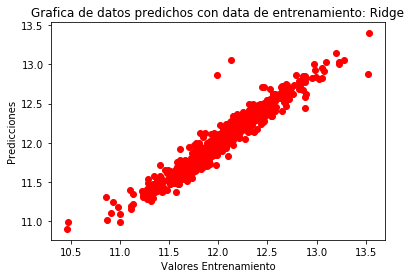

In [69]:
plt.scatter(y_train_t,prediccion_train_ridge,c="r")
plt.xlabel('Valores Entrenamiento')
plt.ylabel('Predicciones')
plt.title('Grafica de datos predichos con data de entrenamiento: Ridge')
#cramos un gráfico de dispersión 

Text(0.5, 1.0, 'Grafica de datos predichos con data de prueba: Ridge')

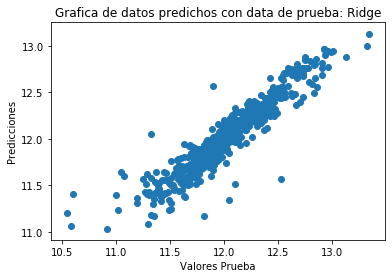

In [70]:
plt.scatter(y_test_t,prediccion_test_ridge)
plt.xlabel('Valores Prueba')
plt.ylabel('Predicciones')
plt.title('Grafica de datos predichos con data de prueba: Ridge')
#creamos un gráfico de dispersión

### Bayesian Ridge

La regresión bayesiana permite un mecanismo para adaptarse a los datos insuficientes o mal distribuidos formulando la regresión lineal mediante distribuidores de probabilidad en lugar de estimaciones puntuales. Se supone que la respuesta "y" se extrae de una distribución de probabilidad en lugar de estimarse como un valor único.<br>
La regresión Bayesiana Ridge estima un modelo probabilístico del problema de regresión. 

In [71]:
modelo_bayrid=sklearn.linear_model.BayesianRidge()#se crea modelo BayesianRidge
modelo_bayrid=modelo_bayrid.fit(x_train_t,y_train_t)#se ajusta modelo con los datos de entrenamiento

prediccion_train_bayrid=modelo_bayrid.predict(x_train_t)#se hace prediccion con los datos de entrenamiento
prediccion_test_bayrid=modelo_bayrid.predict(x_test_t)#se hace prediccion con los datos de prueba

Text(0.5, 1.0, 'Grafica de datos predichos con data de entrenamiento: Bayesian Ridge')

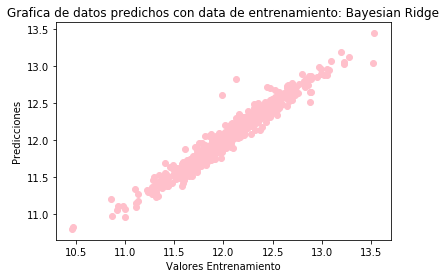

In [72]:
plt.scatter(y_train_t,prediccion_train_bayrid,c="pink")
plt.xlabel('Valores Entrenamiento')
plt.ylabel('Predicciones')
plt.title('Grafica de datos predichos con data de entrenamiento: Bayesian Ridge')
#creamos su gráfica de dispersión

Text(0.5, 1.0, 'Grafica de datos predichos con data de prueba: Bayesian Ridge')

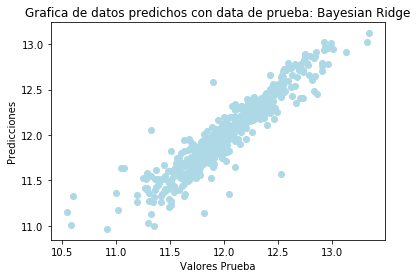

In [73]:
plt.scatter(y_test_t,prediccion_test_bayrid,c='lightblue')
plt.xlabel('Valores Prueba')
plt.ylabel('Predicciones')
plt.title('Grafica de datos predichos con data de prueba: Bayesian Ridge')
#Creamos su gráfica de dispersión

## Evaluando Modelo Creado

### Ridge

In [74]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test_t,prediccion_test_ridge))
print('Mean Squared Error:',metrics.mean_squared_error(y_test_t,prediccion_test_ridge))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test_t,prediccion_test_ridge)))
print('Root Mean Squared Logarithmic Error:',np.sqrt(metrics.mean_squared_error(y_test_t,prediccion_test_ridge)))

Mean Absolute Error: 0.09712893145032706
Mean Squared Error: 0.020928286603703702
Root Mean Squared Error: 0.144666121133124
Root Mean Squared Logarithmic Error: 0.144666121133124


### Bayesian Ridge

In [75]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test_t,prediccion_test_bayrid))
print('Mean Squared Error:',metrics.mean_squared_error(y_test_t,prediccion_test_bayrid))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test_t,prediccion_test_bayrid)))
print('Root Mean Squared Logarithmic Error:',np.sqrt(metrics.mean_squared_error(y_test_t,prediccion_test_bayrid)))

Mean Absolute Error: 0.10034200948507321
Mean Squared Error: 0.021609968198572922
Root Mean Squared Error: 0.1470032931555376
Root Mean Squared Logarithmic Error: 0.1470032931555376


## Prediciendo los valores de los datos test.csv

### Ridge

In [76]:
y_predict_test_ridge=modelo_ridge.predict(x_test)
#Con el modelo creado anteriormente, se predice la variable objetivo con los datos porporcionados test.

In [77]:
prediccion_ridge=pd.DataFrame(y_predict_test_ridge,columns=['SalePrice_Predicted']) 
#se guardan como Df los datos predichos.
dfinal_ridge=pd.concat([y,prediccion_ridge],axis=1)
#se guarda en un solo Df lo predicho y los datos target de la train data.

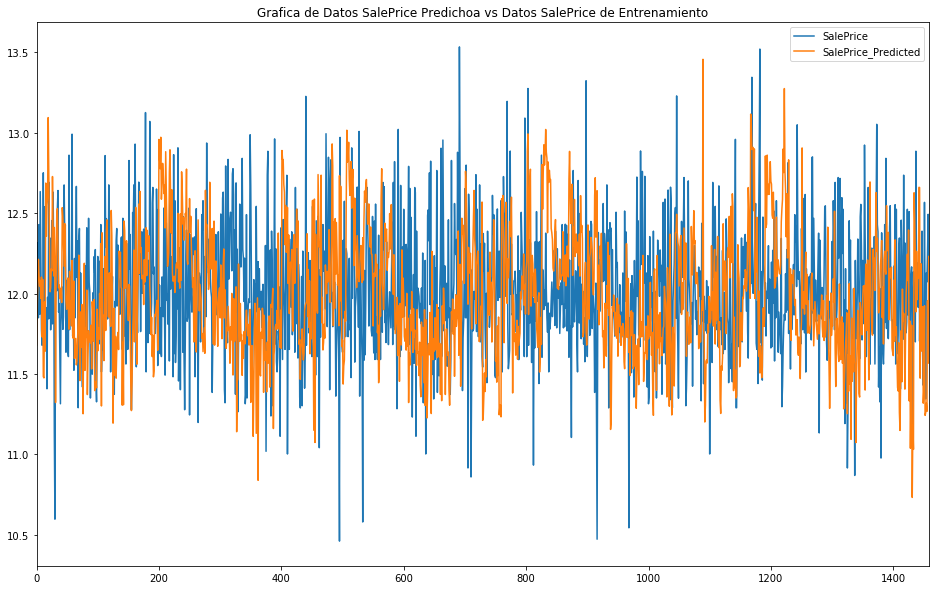

In [78]:
dfinal_ridge.plot(kind='line',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='white')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.title('Grafica de Datos SalePrice Predichoa vs Datos SalePrice de Entrenamiento')
plt.show()


In [79]:
#Los datos estaban normalizados, se deben elevar con la exponencial para eliminar el logaritmo aplicado anteriormente.
regression_res__ridge=np.exp(y_predict_test_ridge)
regression_res__ridge=pd.DataFrame(regression_res__ridge,columns=['SalePrice'])#se guardan como Df los datos predichos.

ids_df_test=pd.DataFrame(df_test["Id"])
#El id de los datos test se une con los datos predichos para saber a que nos referimos.
results_ridge=pd.concat([ids_df_test,regression_res__ridge],axis=1)

In [80]:
#Guardamos en csv
results_ridge.to_csv('results_ridge.csv',index=False)
results_ridge.head()

,Id,SalePrice
0,1461,118140.821425
1,1462,146329.545126
2,1463,176292.117985
3,1464,201347.904339
4,1465,181593.646508


### Bayesian Ridge

In [81]:
y_predict_test_bayrid=modelo_bayrid.predict(x_test)
#Con el modelo creado anteriormente, se predice la variable objetivo con los datos porporcionados test.

In [82]:
prediccion_bayrid=pd.DataFrame(y_predict_test_bayrid,columns=['SalePrice_Predicted']) 
#se guardan como Df los datos predichos.
dfinal_bayrid=pd.concat([y,prediccion_bayrid],axis=1) 
#se guarda en un solo Df lo predicho y los datos target de la train data.

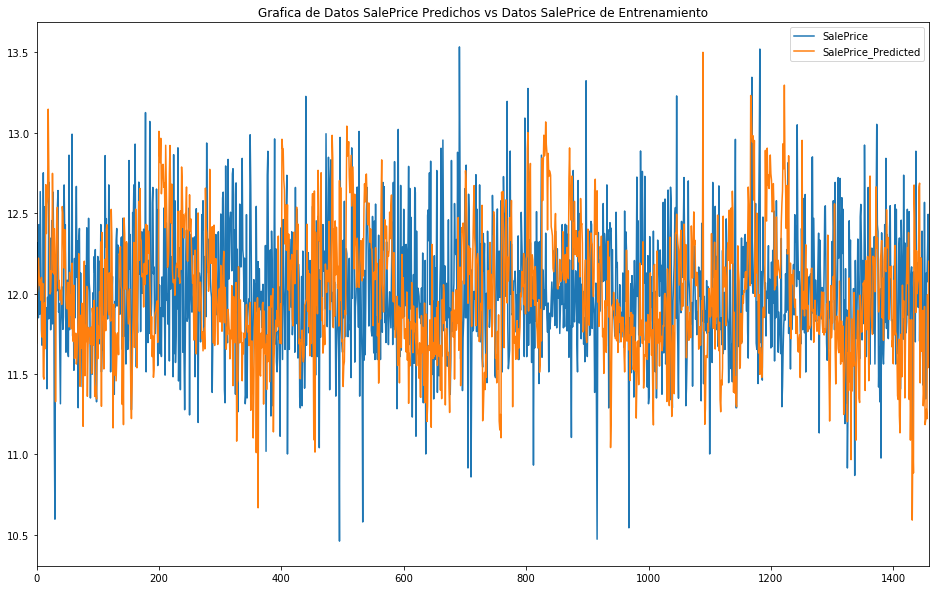

In [83]:
dfinal_bayrid.plot(kind='line',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='white')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.title('Grafica de Datos SalePrice Predichos vs Datos SalePrice de Entrenamiento')
plt.show()


In [84]:
#Los datos estaban normalizados, se deben elevar con la exponencial para eliminar el logaritmo aplicado anteriormente.
regression_res__bayrid=np.exp(y_predict_test_bayrid)
regression_res__bayrid=pd.DataFrame(regression_res__bayrid,columns=['SalePrice'])#se guardan como Df los datos predichos.

#El id de los datos test se une con los datos predichos para saber a que nos referimos.
results_bayrid=pd.concat([ids_df_test,regression_res__bayrid],axis=1)

In [85]:
#Guardamos en csv
results_bayrid.to_csv('results_bayrid.csv',index=False)
results_bayrid.head()

,Id,SalePrice
0,1461,119667.655872
1,1462,162432.929893
2,1463,171068.990766
3,1464,202915.496987
4,1465,184610.766372


## Conclusiones

Primero visualizamos los datos escogiendo unas variables y graficandolas con nuestra variable objetivo 'SalePrice' para ver como se comportaban. Hicimos esto para variables numericas y categóricas.<br>

Con lo anterior analizamos las variables que nos parecíeron importantes a nosotras. Pero esto es subjetivo. Para saber cuales son las variables que realmente nos interesan usamos la matriz de correlación. Codificamos un grafico de calor para tener visualmente las variables mas correlacionadas entre si. Tambien hicimos otro grafico de calor para ver que variables estaban mas relacionadas con 'SalePrice' y como se relacionaban entre si.<br>

Despues de ver que variables son las que nos sirven segun la matriz de corelacion, hicimos varias graficas de dispersión de las variables escogidas para ver que informacion nos proporcionaban.<br><br>

Despues de visualizar nuestros datos, descartamos las variables que vimos que estaban muy correlacionadas en la matriz de correlacion. Posteriormente necesitabamos saber si los datos faltantes tenian algun patron o si su ausencia era al azar. Tambien queriamos ver con que frecuencia faltan datos y si es que es importante o no su ausencia. En esta parte nos detuvimos un poco ya que, como vimos muchos datos faltantes de varias variables, automaticamente asumimos que no nos iban a servir y eliminamos esas variables que tenian muchos datos de tipo NAn. Eliminar estas variables fue un error ya que afectaban nuestro modelo tremendamente, por lo que decidimos revisar detenidadmente estas variables con datos faltantes. Nos dimos cuenta de que en todas esas variables con "datos faltantes", los datos de tipo Na no significaban que faltaran datos si no que las casas no contaban con la caracteristica a la que se referia la variable.<br>
Por lo anterior, decidimos sustituir los datos de tipo NA con la palabra "None" para indicar que la casa no contaba con la caracteristica que indicaba la variable. Tambien sustituimos los NA en casos cuando se podia poner al numero 0 u otros valores.<br><br>

Para continuar con el modelo, normalizamos los datos de nuestra variable objetivo 'SalePrice' para asi poder usar los datos sin problema.<br><br>

Despues convertimos a tipo string las variables numericas ordinales que no queremos que afecten la regresion. Posteriormente, por medio de la funcion get_dummies de la libreria pandas, se convirtieron variables categóricas en variables indicadoras con 0's y 1's. Para poder usar en nuestro modelo.<br><br>

Teniamos nuestros datos train y test todos juntos en una misma tabla para poder manipularla toda al mismo tiempo. En este punto la separamos nuevamente en dos tablas y aparte en otra columna los datos de 'SalePrice'.<br>
Con la funcion train_test_split de la libreria sklearn se dividieron las tablas de nuestros datos train y nuestro target en subconjuntos aleatorios de entrenamiento y prueba para crear nuestros modelos.<br><br>

Se crearon dos modelos, el  modelo Ridge y el modelo Bayesian Ridge.<br>

La regresión Ridge de la libreria sklearn resuelve un modelo de regresión donde la función de pérdida es la función lineal de mínimos cuadrados y la regularización viene dada por la norma L2. También se conoce como regresión Ridge o regularización Tikhonov. Este estimador tiene soporte incorporado para la regresión multivariada.
El atributo alpha de la funcion Ridge indica la fuerza de regularización; el cual debe ser un real positivo. La regularización mejora el condicionamiento del problema y reduce la varianza de las estimaciones. Los valores más grandes especifican una regularización más fuerte.<br>

La regresión bayesiana permite un mecanismo para adaptarse a los datos insuficientes o mal distribuidos formulando la regresión lineal mediante distribuidores de probabilidad en lugar de estimaciones puntuales. Se supone que la respuesta "y" se extrae de una distribución de probabilidad en lugar de estimarse como un valor único.<br>
La regresión Bayesiana Ridge estima un modelo probabilístico del problema de regresión. <br><br>

Para ambos modelos se usaron las siguientes funciones.<br>
La funcion fit,  ajusta el modelo lineal. Tiene como parámetros los datos de entrenamiento(todas las features) y los valores objetivo (la variable que queremos predecir).<br>
La funcion predict hace la predicción mediante el modelo lineal creado. Tiene como parámetros los datos de entrenamiento.<br><br>

Se evaluaron los modelos calculando los errores.<br>

Ridge<br>
Mean Absolute Error: 0.09648838313303039<br>
Mean Squared Error: 0.01938634446532031<br>
Root Mean Squared Error: 0.13923485362983046<br>
Root Mean Squared Logarithmic Error: 0.13923485362983046<br><br>

Bayesian Ridge<br>
Mean Absolute Error: 0.09769426922628666<br>
Mean Squared Error: 0.019295928717425408<br>
Root Mean Squared Error: 0.13890978625505623<br>
Root Mean Squared Logarithmic Error: 0.13890978625505623<br><br>

Se puede observar que los erroes son muy cercanos, pero el modelo Bayesian Ridge resulta ligeramente ser mejor.
Se usaron los modelos para predecir la variable objetivo 'SalePrice' de los datos test.csv. Se obtuvieron graficas en las que se obseva la interseccion entre los valores predecidos y los de entrenamiento. Lo que nos muestra que nuestros modelos si cumplieron su objetivo pero tambien podemos ver que se puede mejorar.


Finalmente, subimos nuestros resultados a kaggle, en donde se nos dio un error del 0.1450.

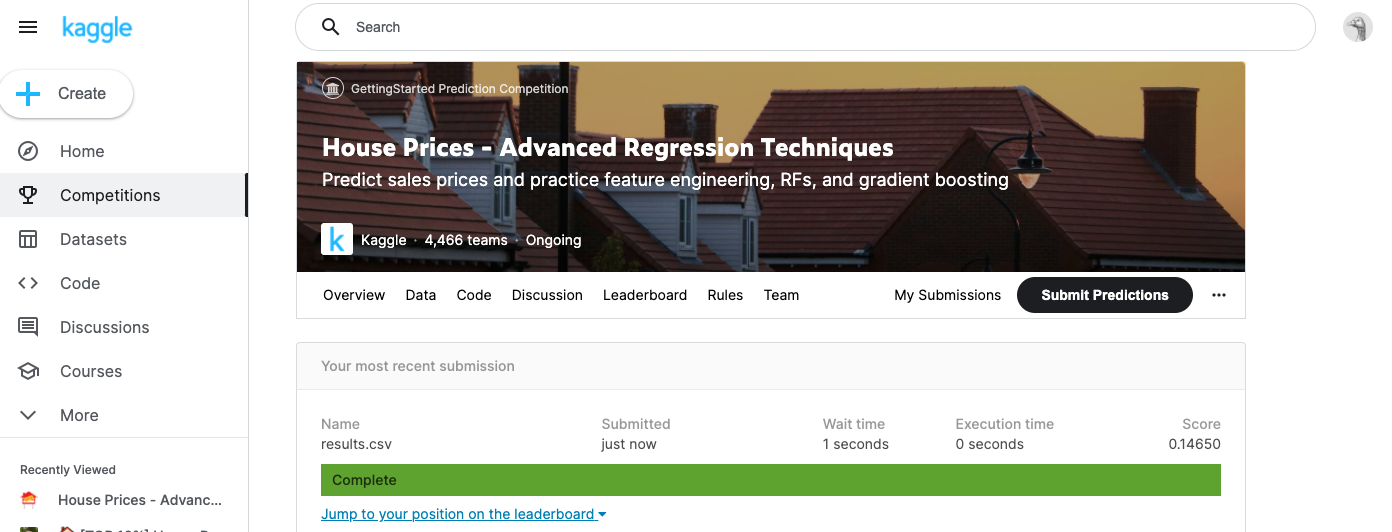

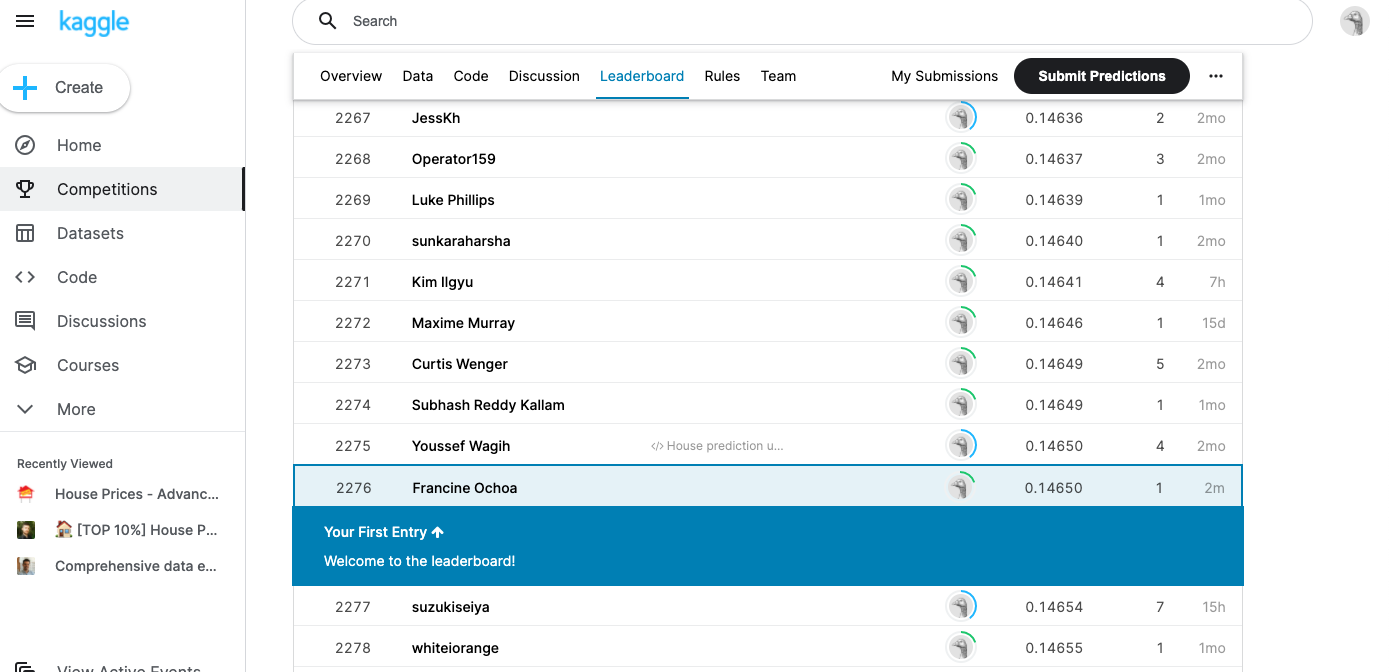

## Referencias

https://www.tutorialspoint.com/scikit_learn/scikit_learn_bayesian_ridge_regression.htm
<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
<br>
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/notebook
<br>
https://realpython.com/linear-regression-in-python/
<br>
https://www.kaggle.com/gcdatkin/top-10-house-price-regression-competition-nb
